In [40]:
# Import relevant packages and data

#make students do: conda env create -f frontiers_in.yml
# and activate conda env create -f environment.yml 

# Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import geopandas
import ipywidgets as widgets
%matplotlib inline

# CAMELS data
hydro = pd.read_csv('data/camels_hydro.txt', sep=";", header=0)
geo = pd.read_csv('data/camels_geol.txt', sep=";", header=0)
clim = pd.read_csv('data/camels_clim.txt', sep=";", header=0)
soil = pd.read_csv('data/camels_soil.txt', sep=";", header=0)
veg = pd.read_csv('data/camels_vege.txt', sep=";", header=0)
topo = pd.read_csv('data/camels_topo.txt', sep=";", header=0)
name =  pd.read_csv('data/camels_name.txt', sep=";", header=0)
HCDN = pd.read_excel('Sheds_EcoRegions2_TAC_NDVI_ET.xlsx')


### INTERMEZZOO

new_index = np.empty((len(hydro),1,))
frame_to_be_merged = pd.DataFrame(np.empty((len(hydro),20,)))  

frame_to_be_merged.columns = ["SiteID", "Lat", "Lon", "EcoID", "EcoRegion2", 
                             "Beta", "ET_Age", "TAC_NDVI_16", "TAC_NDVI_32", "TAC_NDVI_64",
                             "TAC_NDVI_126", "TAC_NDVI_365", "TAC_ET_1", "TAC_ET_4", "TAC_ET_8", "TAC_ET_16",
                             "TAC_ET_32", "TAC_ET_64", "TAC_ET_126", "TAC_ET_365"]


G = (hydro["gauge_id"])

for i in range(0, len(hydro)):
    Z=(HCDN.SiteID==G[i])
    if np.where(Z)[0]>0:
        k = int(np.where(Z)[0])
        new_index[i]= int(np.array(k))
    else:
        new_index[i]=np.NaN  
 

for i in range(0, len(hydro)):
    if new_index[i]>0:
        frame_to_be_merged.iloc[i] =HCDN.iloc[new_index[i]]
    else:
        k = pd.DataFrame(np.empty((1,20,)))
        k[:] = np.nan
        frame_to_be_merged.iloc[i] = k
        
frames = [hydro,soil, topo, clim, veg,frame_to_be_merged]

merged = pd.concat([hydro,soil, topo, clim, veg,frame_to_be_merged], axis=1)

###

#frames = [hydro,soil, topo, clim, veg,frame_to_be_merged]

#merged = pd.concat([hydro,soil, topo, clim, veg,frame_to_be_merged], axis=1)

hydro.reset_index(drop=True, inplace=True)
soil.reset_index(drop=True, inplace=True)
topo.reset_index(drop=True, inplace=True)
clim.reset_index(drop=True, inplace=True)
veg.reset_index(drop=True, inplace=True)
frame_to_be_merged.reset_index(drop=True, inplace=True)



del merged['gauge_id']

# load shapefile USA
states = geopandas.read_file('shapefiles/usa-states-census-2014.shp')

plt.rcParams["figure.figsize"] = (12, 7)

/var/folders/m6/29dmlndn6fq4qjsjj9238fy00000gn/T/ipykernel_21938/3246079201.py:42: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.where(Z)[0]>0:


In [41]:
## A histogram that allows you to pick which variable you want to display and the number of bins

def run_histogram(variable,bin_count):
    
    ## Python example
    X = merged[variable]
    fig = plt.figure(figsize =(5, 3))
     # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])
    # Creating plot
    plt.hist(X, bins=bin_count, alpha=0.5)
    # adding labels
    ax.set_xlabel(variable)
    ax.set_ylabel('Count')
    print(X.describe())
    plt.show()
    
widgets.interact(run_histogram,variable = merged, bin_count=(1,50,1))

interactive(children=(Dropdown(description='variable', options=('q_mean', 'runoff_ratio', 'slope_fdc', 'basefl…

<function __main__.run_histogram(variable, bin_count)>

interactive(children=(Dropdown(description='variable_x', options=('q_mean', 'runoff_ratio', 'slope_fdc', 'base…

<function __main__.run_scatter(variable_x, variable_y, variable_z, log_x_on, log_y_on, polyfit)>

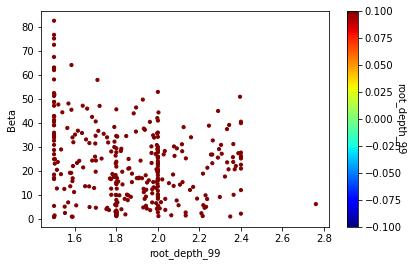

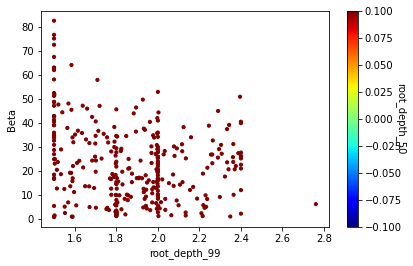

In [48]:
## Scatterplots

def run_scatter(variable_x,variable_y,variable_z,log_x_on,log_y_on,polyfit):

    ## Python example
    X = merged[variable_x]
    Y = merged[variable_y]
    Z = merged[variable_z]

    fig = plt.figure(figsize =(5, 3))
    
    # Creating axes instance
    cm=plt.get_cmap('jet') # picks color based on these options: 
    #https://matplotlib.org/stable/tutorials/colors/colormaps.html 
    
    ax = fig.add_axes([0, 0, 1, 1])
    
    print(min(Z))
    # Creating plot
    sc = plt.scatter(X, Y,c=Z,  vmin=min(Z), vmax=max(Z),s=10, cmap=cm)
    
    # adding labels
    ax.set_xlabel(variable_x)
    ax.set_ylabel(variable_y)
    cbar = plt.colorbar(sc)
    cbar.set_label(variable_z, rotation=270)

    new_X = X[np.logical_not(np.isnan(X*Y))]
    new_Y = Y[np.logical_not(np.isnan(X*Y))]

    #show plot
    linear_model=np.polyfit(new_X,new_Y,polyfit)
    linear_model_fn=np.poly1d(linear_model)
    x_s=np.arange(min(X),max(X),(max(X)-min(X))*0.0001)
    plt.plot(x_s,linear_model_fn(x_s),color="green")
    print(linear_model_fn)
    if log_x_on =="Yes": 
        plt.xscale("log")
        
    if log_y_on =="Yes": 
        plt.yscale("log")
        
    plt.show()
    
    print('spearman')
    print(stats.spearmanr(new_X,new_Y))
    print('pearson')
    print(stats.pearsonr(new_X,new_Y))
    
widgets.interact(run_scatter,variable_x = merged,
                             variable_y = merged,
                             variable_z = merged,
                             log_x_on = ["No","Yes"],
                             log_y_on = ["No","Yes"],
                             polyfit = [1, 2, 3, 4, 5, 6, 7, 8])



In [37]:
# Make a map of a variable and adjust the upper and lower boundary of the colorscale

def map_maker(variable,min_fac,max_fac):
    plt.close()
    
    X = merged[variable]
    states.boundary.plot(color='black')
    cm=plt.get_cmap('jet') # choses color based on these options: https://matplotlib.org/stable/tutorials/colors/colormaps.html 
    sc = plt.scatter(topo.gauge_lon, topo.gauge_lat, c=X,  vmin=min(X)*min_fac, vmax=max(X)*max_fac, s=10, cmap=cm)
    cbar = plt.colorbar(sc, shrink=0.5)
    
    cbar.set_label(variable, rotation=270)
    plt.xlim(-127, -67)
    plt.ylim(24, 50)
    plt.show()

widgets.interact(map_maker,variable = merged,
                min_fac = (0,2,0.1), max_fac = (0,2,0.05))

interactive(children=(Dropdown(description='variable', options=('q_mean', 'runoff_ratio', 'slope_fdc', 'basefl…

<function __main__.map_maker(variable, min_fac, max_fac)>

In [38]:
# As a reference, we make a correlation matrix of everything against everything. 
# You can manually pick which correlation coefficient is presented in the graph

def correlation_overview(corr_type):
    corrmat = merged.corr(method= corr_type, min_periods = 1)
    f, ax = plt.subplots(figsize =(15, 13))
    sns.heatmap(corrmat, ax = ax, cmap ="BrBG", linewidths = 0.1)

widgets.interact(correlation_overview, corr_type = ['pearson', 'kendall', 'spearman'])

interactive(children=(Dropdown(description='corr_type', options=('pearson', 'kendall', 'spearman'), value='pea…

<function __main__.correlation_overview(corr_type)>

In [49]:
#!source activate frontiers_in.yml
#conda info --envs
#conda env export | grep -v "^prefix: " > environment.yml